In [5]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Track Statstics

In [6]:
track_split = json.load(open("../dataset/ecals_annotation/ecals_track_split.json", 'r'))
tr = track_split['train_track'] + track_split['extra_track'] # data added from student set of cals.
va = track_split['valid_track']
te = track_split['test_track']
print(len(tr), len(va), len(te))

444865 34481 34631


# Tag Statstics

In [7]:
annotation = json.load(open("../dataset/ecals_annotation/annotation.json", 'r'))
tags, artist, album, year, captions = [], [], [], [], []
for k,v in annotation.items():
    tags.extend(list(set(v['tag'])))
    artist.append(v['artist_name'])
    album.append(v['release'])
    year.append(v['year'])
    captions.append(", ".join(list(set(v['tag'])))) # order
print(len(set(captions)), len(set(tags)), len(set(artist)), len(set(album)), len(set(year)))

139541 1054 32650 89920 90


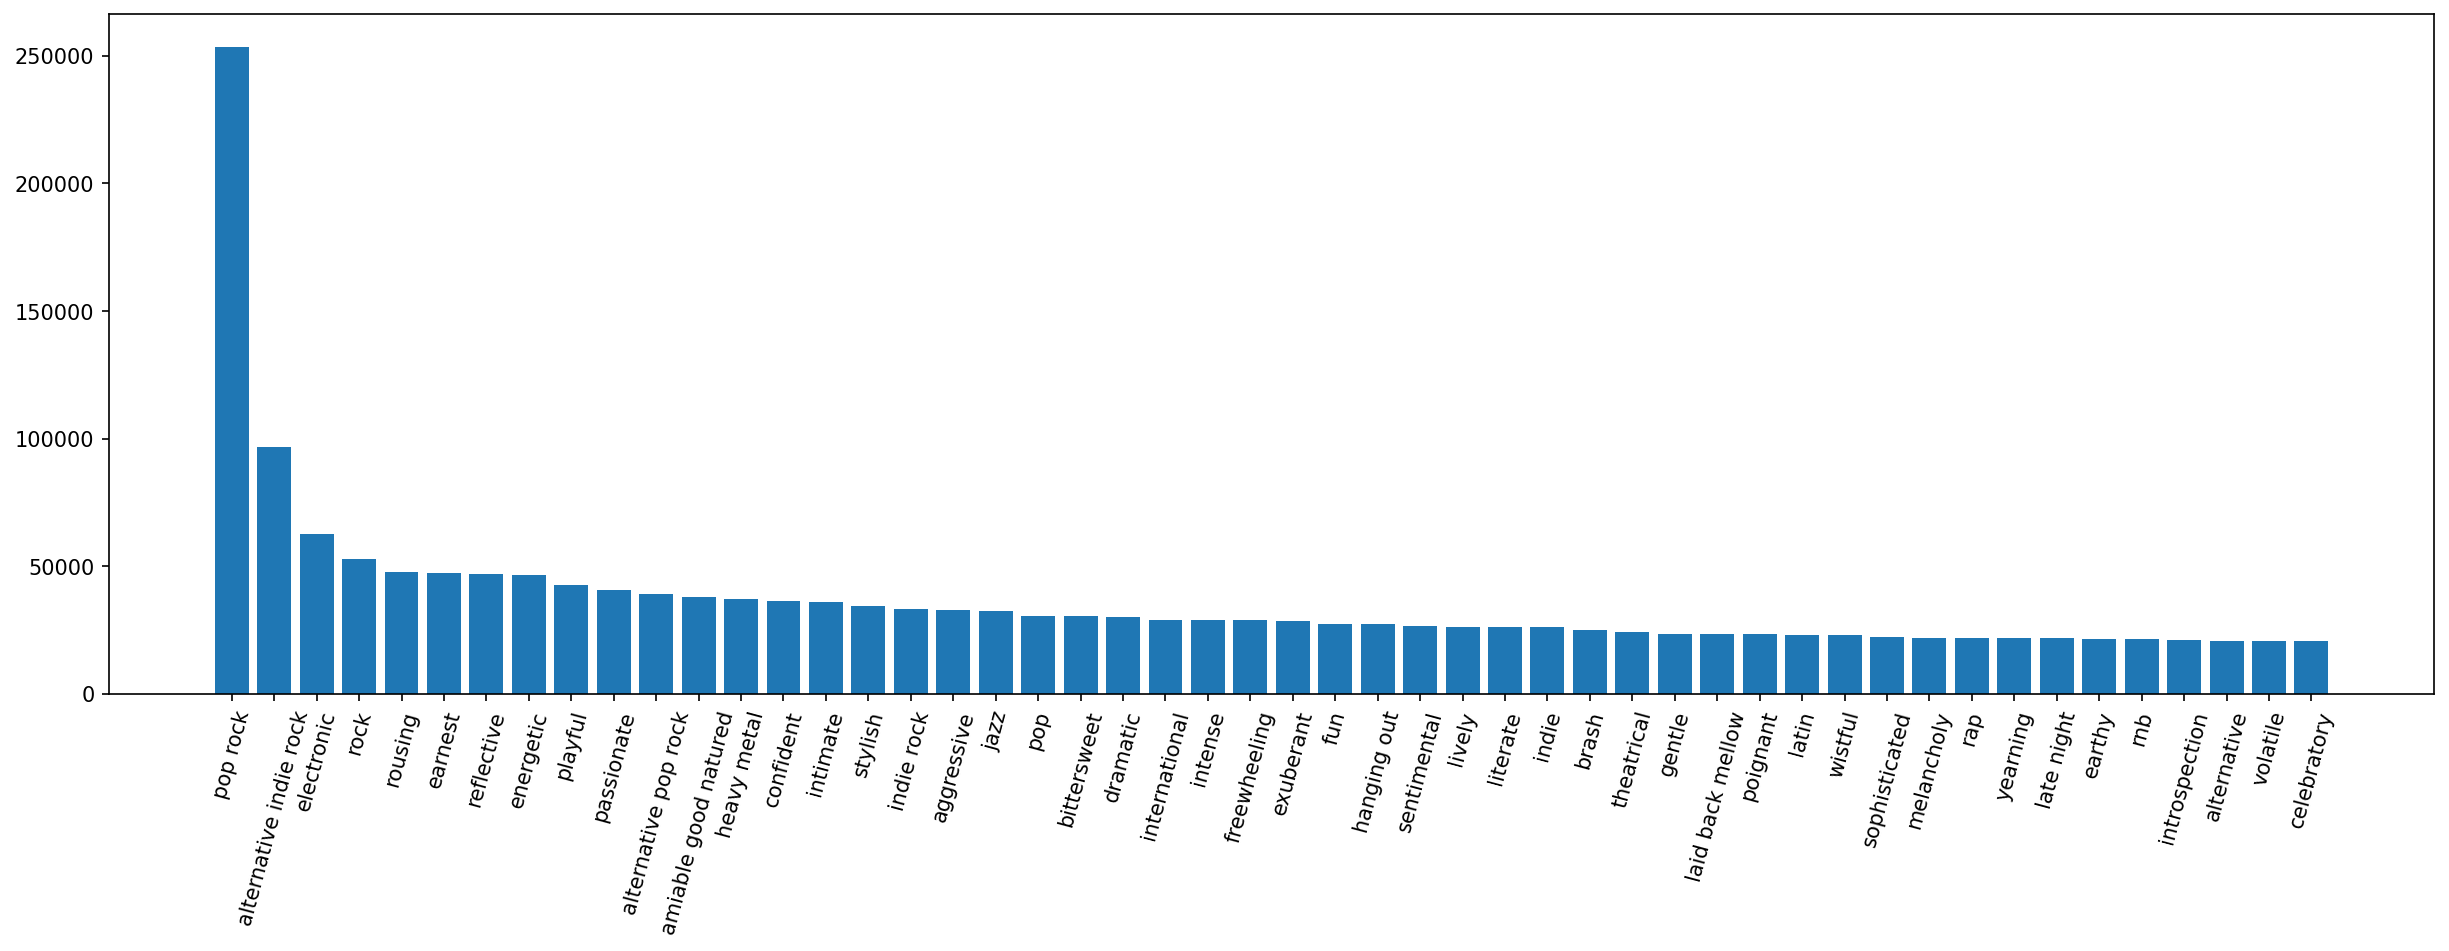

In [8]:
plt.figure(figsize=(20, 6), dpi=150)
df_tag = pd.DataFrame(Counter(tags).most_common()).set_index(0).head(50) # top 50 tag
x = np.arange(len(df_tag))
plt.bar(x, df_tag[1])
plt.xticks(x, df_tag.index, rotation=75)
plt.show()

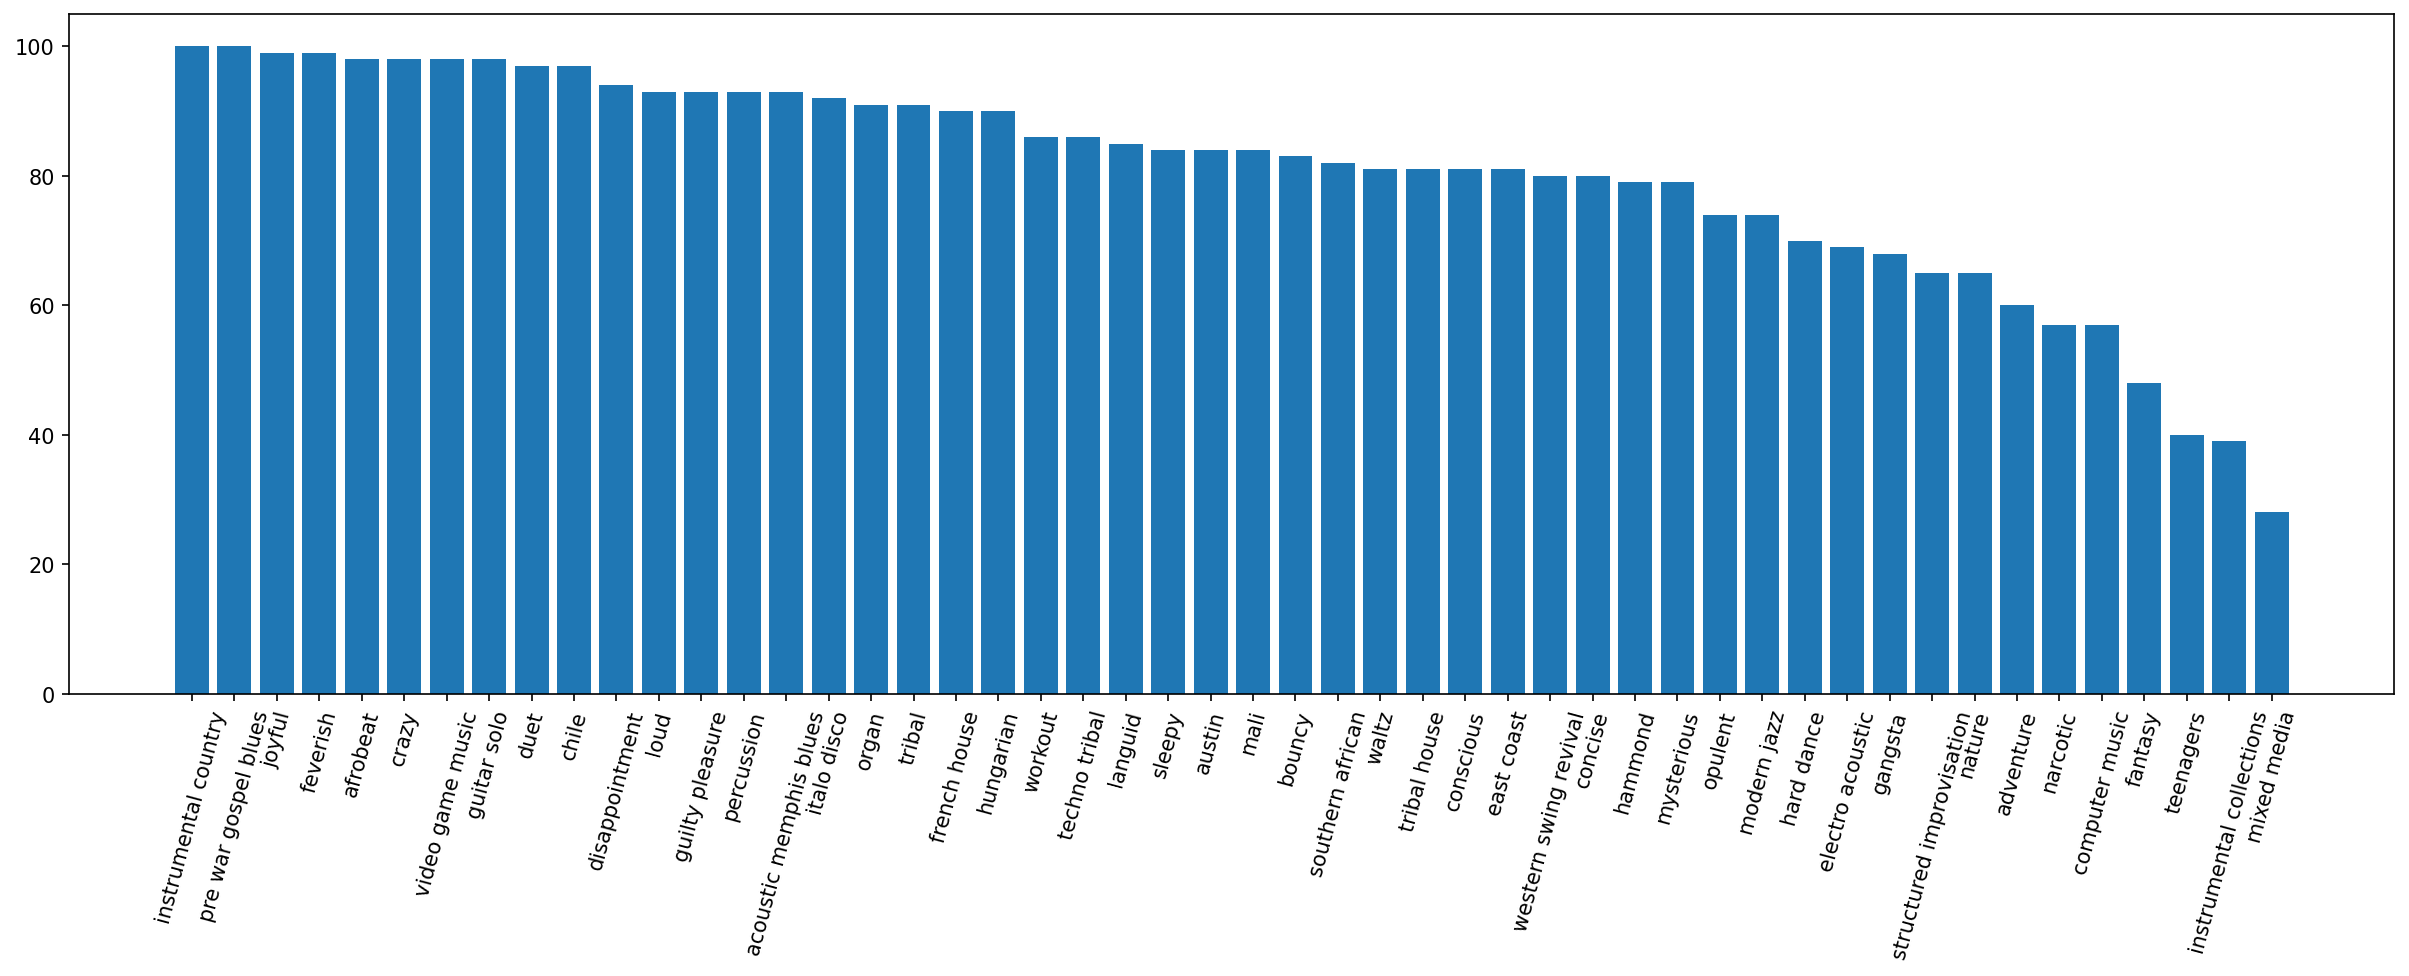

In [9]:
plt.figure(figsize=(20, 6), dpi=150)
df_tag = pd.DataFrame(Counter(tags).most_common()).set_index(0).tail(50) # bottom 50 tag
x = np.arange(len(df_tag))
plt.bar(x, df_tag[1])
plt.xticks(x, df_tag.index, rotation=75)
plt.show()

# Tag Category Statstics

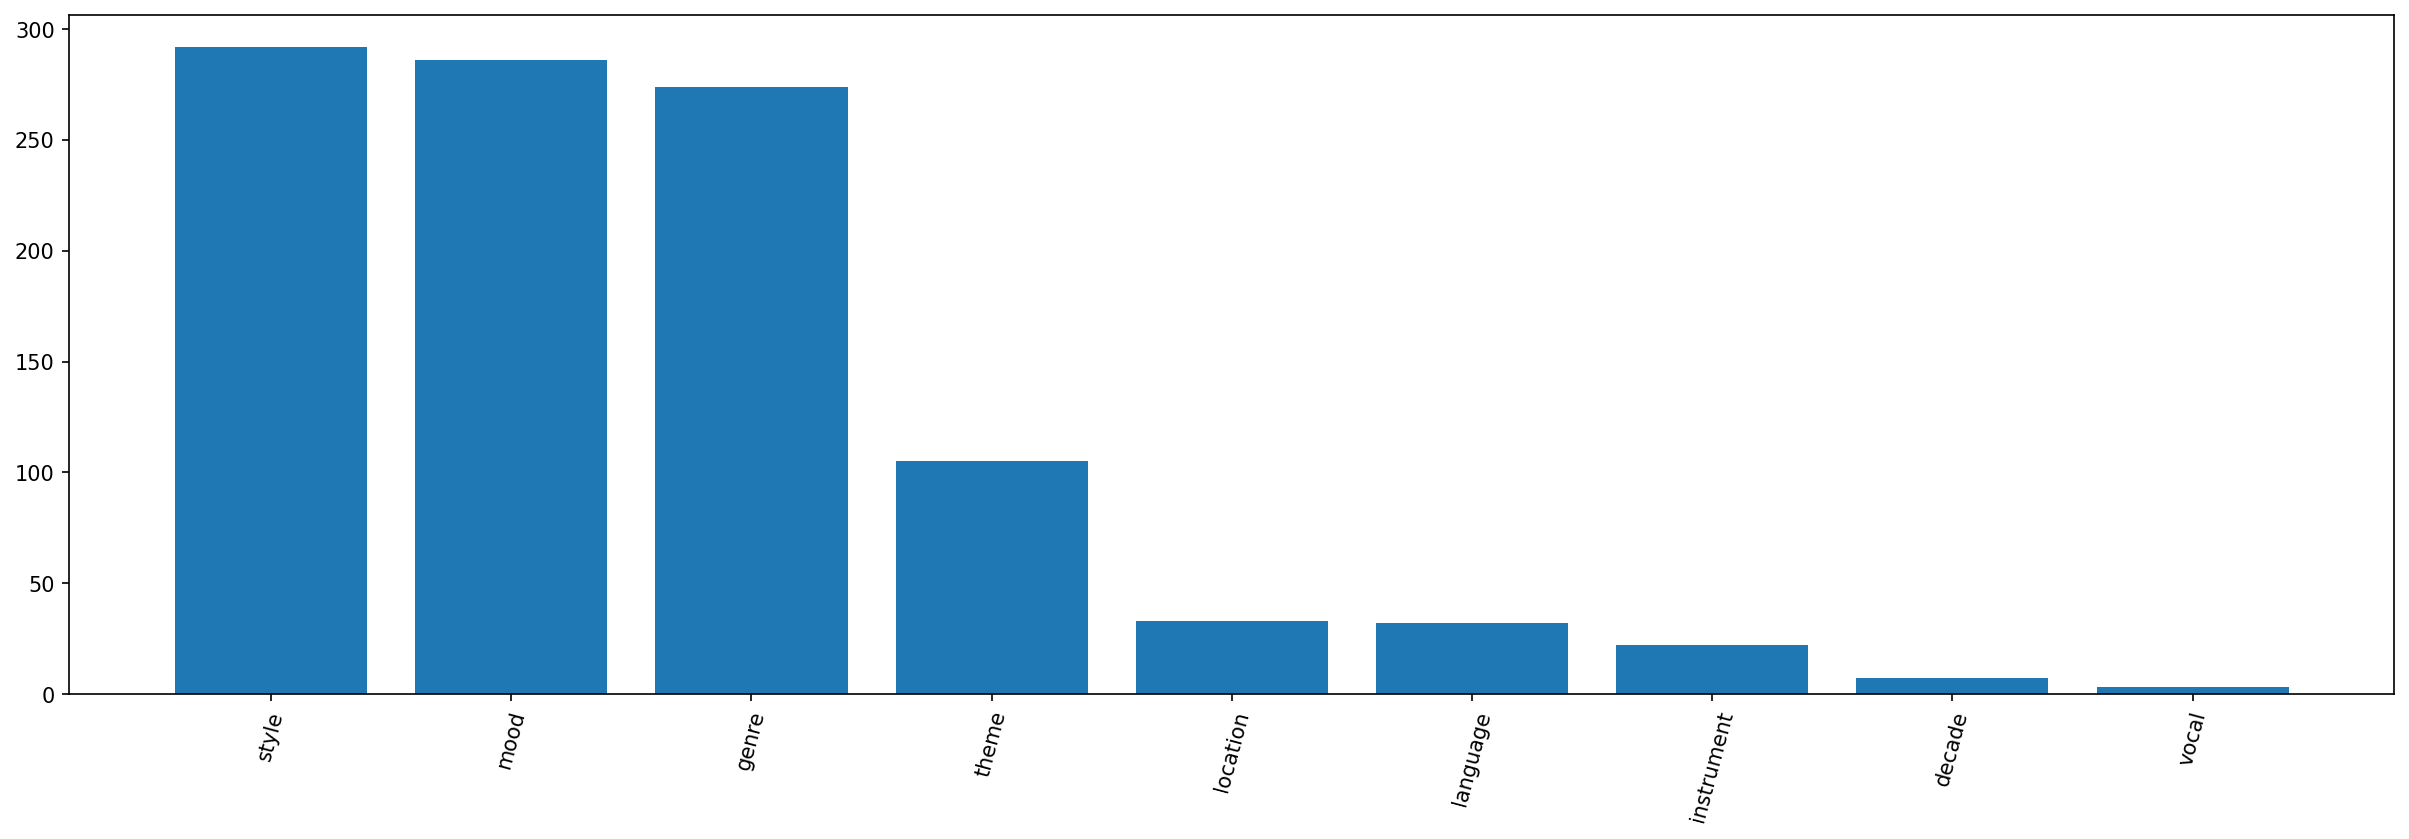

In [10]:
tag_info = json.load(open("../dataset/ecals_annotation/ecals_tag_info.json", 'r'))
plt.figure(figsize=(20, 6), dpi=150)
df_category = pd.DataFrame(Counter([i[0] for i in tag_info.values()]).most_common()).set_index(0)
x = np.arange(len(df_category))
plt.bar(x, df_category[1])
plt.xticks(x, df_category.index, rotation=75)
plt.show() 